# Deep Learning - *SS19 - 27.06.2019*
# 1D-CNN Tutorial 01: Simple 1D-CNNs in Keras

## Table of Contents
- [Introduction](#introduction)<br>
- [Revision: Convolutional Neural Networks](#Convolutional_Neural_Networks)<br>
- [1D CNN vs. 2D CNN](#1D_CNN_vs_2D_CNN)<br>
    - [What are the differences between 1D and 2D CNNs?](#What_are_the_differences_between_1D_and_2D_CNNs)<br>
- [Construction of a 1D CNN in Keras](#Construction_of_a_1D_CNN_in_Keras)<br>
    - [How to construct a 1D CNN in Keras?](#How_to_construct_a_1D_CNN_in_Keras)<br>
- [1D-CNN text classification](#1D_CNN_text_classification)<br>
    - [The dataset](#The_dataset)<br>  
    - [Prepare data](#Prepare_data)<br>
    - [Build model](#Build_model)<br>
    - [Evaluation data](#Evaluation_data)<br>
    - [Plot data](#Plot_data)
    - [Predictions](#predictions)
    - [Compromise](#compromise)
- [Summary](#summary)<br>
- [References](#references)<br>

## Introduction<a id="introduction"></a>

This tutorial is about 1D convolutional neural networks (1D CNNs or 1D ConvNets) for text classification in Keras. It gives a short introduction about these types of neural networks and shows the diffrences between an one dimension CNN and a two dimension CNNs, which where already known.  
Then the tutorial shows how to develop an exemplary one dimensional CNN step-by-step. Afterwards there's an excercise where you have to tune a CNN yourself to get to know the parameters better.


## Revision: Convolutional Neural Networks <a id="Convolutional_Neural_Networks"></a>

A convolutional neural network (CNN or ConvNet), as we have already learned, is an artificial neural network. CNNs are used in numerous modern artificial intelligence technologies, primarily in the machine processing of image or audio data. Basically, the structure of a classic convolutional neural network consists of one or more convolutional layers, followed by a pooling layer and a fully-connected layer. In principle, this unit can be repeated as often as desired. 

By learning and applying features (training), it is possible to recognize patterns and objects through the network. Higher layers use the data of lower layers, so that even more complex patterns can be recognized. 

## 1D CNNs versus 2D CNNs<a id="1D_CNN_vs_2D_CNN"></a>

The first tutorial about CNNs ('Simple convolutional neural network for handdrawn digit recognition in Keras') focused on a two dimensional convolutional neural network, which is especially suitable for image recognition problems. One dimensional convolutional neural network, on the other hand, are more commonly used for natural language processing (NLP) or analysis of time sequences of sensor data. Other or more specific examples could be audio signals, gyroscope or accelerometer data. 

### What are the differences between 1D and 2D CNNs?<a id="What_are_the_differences_between_1D_and_2D_CNNs"></a>

CNNs, whether 1D, 2D or 3D CNNs, share the same properties and approach. The biggest difference is the dimensionality of the input data and the way the filters, also known as convolution kernel or feature detector, used move across the data. Below is a sample visualization of the data processing of a 1D CNN compared to a 2D CNN. The illustration is an excellent opportunity to demonstrate the different processing methods using examples:  

![1D CNN and 2D CNN - Examples](img/1Dcnn_vs_2Dcnn.png "1D CNN and 2D CNN - Examples")

**Explanatory note:** In the graphic on the left we see an example for NLP (example for 1D CNN). The set consists of six parts, each represented by a vector. The feature detector always covers the complete word, where the height of the Detector determines how many components of a sentence are taken into account during training. In this example, the height is two and the feature detector would iterate five times over the data. 
On the right side we see the example of a 2D CNN based on computer vision. Each pixel of the image is defined by an x and a y position. In addition, each pixel also contains the three values for RGB. The feature detector in this case has a dimension of 2x2. As suggested in the graphic, the feature detector moves horizontally and vertically across the image. 

The above-mentioned examples of the use of 1D CNNs already show that they are very effective in extracting characteristics from a fixed-length segment of the entire data set. However, it should not be too important in the evaluation where the characteristics are located in the segment. 

Another difference between 2D and 1D CNNs is that 1D networks allow the use of larger filter sizes. This means that if a 1D CNN uses a size 7 filter, it has only seven feature vectors, whereas a 2D CNN with a filter size of 7 would have 49 feature vectors, making it a very broad selection. Also, with 1D CNNs, you can use larger convolution windows. A small example: In a 2D convolution layer that uses a 3x 3 convolution window, nine feature vectors (3x3=9) are used. With a 1D convolution layer, a window of size 3 contains only three feature vectors, which means you can afford a window size of 7 or 9 easily.  

## Construction of a 1D CNN in Keras<a id="Construction_of_a_1D_CNN_in_Keras"></a>
There are many standard CNN models that Keras provides. All models can be viewed in detail on the Keras website: https://keras.io/getting-started/sequential-model-guide/ 

### How to construct a 1D CNN in Keras?<a id="How_to_construct_a_1D_CNN_in_Keras"></a>

To understand the steps a 1D CNN goes through, we will look at a simplified example that provides an overview.

![Contruction of a 1D CNN](img/aufbau_1d_cnn.png "Contruction of a 1D CNN")

To make the graphic even more understandable, a few additions to the individual layers. Each input is a matrix defined by height and width. The "height" is the length of a data set that is fed into the network. It is also called the input height. The "width" or also called depth is the width of a data set that is fed into the network.

Pooling is divided into average, mean and max pooling. Pooling layers have the advantage that they reduce the variance, increase the calculation performance, offer possibilities to create deeper networks, which in turn can solve more complex tasks and are a preventive measure against overfitting.
Most often, though, 1D CNNs use max pooling. How the max pooling works is described in the figure. Average pooling works roughly as follows: It counts everything and then flows to the next layer, which means that all values are actually used for feature mapping and output - which is a very generalized calculation. If we don't need all inputs from the conv layer, we get a poor accuracy for the average pooling. However, it is well suited for object localization. Since mean pooling has proven to be less relevant and efficient, we won't go into that further.  

## 1D-CNN text classification<a id="1D_CNN_text_classification"></a>

The phyton code of a 1D CNN is almost analogous to that of a 2D CNN, meaning that most of the commands to create a CNN are identical or at least similar. In this example, a simple 1D CNN model is created, fed with data, and then trained. 

### The dataset<a id="The_dataset"></a>

As our dataset we will use the IMDB dataset, which was already used in the machine learning exercise. Before you start, a little note: Run all code snipes to make sure the 1D CNN creation exercise works smoothly!  

### Prepare data<a id="Prepare_data"></a>

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras.utils import plot_model
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
# Graphic output
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
test_data = x_test
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
#print(x_train[450])

Loading data...
25000 train sequences
25000 test sequences


The IMDB data set consists of 25,000 pre-processed positive and negative film critiques. In pre-processing, each critic is encoded into a sequence of word indices. Same words are assigned to the same number (integer). 

**Example:** ? hello world how is it --> 1 2 3 4 5 6 || ? good question world lkz --> 1 7 8 3 0. 

Then the data set is re-indexed according to the number of contained words and their frequency. This means that the third value in the list is the third most common word in the list. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word. 
This allows fast filter operations like: "Consider only the 10,000 most common words". [[5]](#r5)

- 0 = 0: Stands for words that could not be translated. For example, if the word is not in the database and therefore not known
- 1 = ?: Symbolizes the start of a critic

Arguments:
- **num_words:** integer or None. Top most frequent words to consider. Any less frequent word will appear as `oov_char` value in the sequence data.

In [3]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(sequences=x_train, maxlen=800)
x_test = sequence.pad_sequences(sequences=x_test, maxlen=800)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

Pad sequences (samples x time)
x_train shape: (25000, 800)
x_test shape: (25000, 800)
Build model...


The method `pad_sequences` sets all sequences to the same length. `pad_sequences` converts the list of integers into a 2D numpy array (`num_samples`, `num_timesteps`). 
`num_timesteps` is either the specified maxlen argument or the length of the longest sequence in the list. All sequences that are shorter will be filled to the set length, all sequences that are longer than their set length will be trimmed. The length of the trimmed part is compared with the `num_timesteps` length and either filled or cut again. There is no rule of thumb for selecting the maximum length of the sequences, so you have to test this manually and adjust it to the results. 
What can be said, however, is that the smaller the sequences are selected, the less performance is required. But the recognition rate decreases. [[6]](#r6)

Arguments:
- **sequences:** List of lists, where each element is a sequence
- **maxlen:** Int, maximum length of all sequences


### Build model<a id="Build_model"></a>

In [4]:
model.add(Embedding(input_dim=10000,
                    output_dim=50,
                    input_length=800))

Efficient embedding converts positive integers (indices) into dense vectors of fixed size, meaning each word is converted into a vector of fixed length. Each word is always mapped to the same vector, so that information about the word is encoded in this vector. To use embedding layer, all words must be encoded using indexes. Since the data is already encoded, there is no need to index the data. 

In the next step, the numbers or words (indices) are converted into vectors. For example, the value [[2],[3],[4],[5],[6]] becomes the vector [[0.25, 0.1], [0.6, -0.2],[0.54, 0.3],[0.33, -0.55],[0.03, -0.09]]. 

The `output_dim` parameter can be used to decide how many dimensions are assigned to each index. 
For example, the vectors formed in the example have two dimensions. The generated vectors are now saved in the embedding layer and provided with an index. This index can be used to look up or edit the vector. The vectors of the individual words can be used to examine whether words are similar. When using an embedding layer, however, it should be noted that the embedding layer can only be used as the first layer (input layer) in a model. [[8](#r8)-[10](#r10)]

![Embedding Example](img/embedding_example.png "Embedding Example")

The argumnete used are:
- **input_dim:** int > 0. Size of the vocabulary, i.e. maximum integer index + 1
- **output_dim:** int >= 0. Dimension of the dense embedding
- **input_length:** Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed)

In [5]:
model.add(Dropout(0.5))

After creating an embedding layer, a dropout is generated. The dropout prevents the model from overfitting during the course. For this purpose, a fraction of values from the embedding layer is randomly set to 0. The dropout rate can be selected between 0.0 and 1.0. During each training phase, individual nodes are set to 0 with the specified probability and their edges are removed. This results in a new reduced network with different edge connections in each training phase.

Following the training phase, the removed nodes are reinserted into the network with their original weight. For input nodes, you should make sure that the dropout rate is set low, for example 0.2. Otherwise information will be lost immediately before starting the training and will not be available during the entire training. For other nodes you can usually start with a dropout rate of 0.5. The dropout rate should nevertheless be adjusted according to the training results.

In [6]:
model.add(Conv1D(filters=250,
                 kernel_size=3,
                 padding='valid',
                 activation='relu',
                 strides=1))

Now a `Convolution1D` is added and the word group filters of size `filter_length` are learned. The convolutional layer consists of a layer of "filters". The filters each take up a subset of the input data that is applied over the entire input. During convolution, the input data is assigned to the filters via a linear matrix multiplication. At the end an activtation is made on all data.

Here is an abstract model how the 1D Convolution works:
<br>We call each row in the embedding layer and multiply each element in the block by the weight value and fill in the weighted sum in the output. Instead of a two-dimensional block, in a 1D convolution we use a one-dimensional block of the length of the kernel. This weighted sum is then distributed across all channels. It is also possible to create multiple convlutional layers in a row without having to use one between layers. [[[7]](#r7),[[8]](#r8),[[14]](#r14)]
<br><table><tr>
    <td>![Convolution process](img/conv_01.png "Convolution process")</td>
    <td>![Convolution process](img/conv_02.png "Convolution process")</td>
    <td>![Convolution process](img/conv_03.png "Convolution process")</td>
</tr></table> 

The arguments:
- **filters:** Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution)
- **kernel_size:** An integer or tuple/list of a single integer, specifying the length of the 1D convolution window
- **strides:** An integer or tuple/list of a single integer, specifying the stride length of the convolution. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1
- **padding:** One of "valid", "causal" or "same" (case-insensitive). "valid" means "no padding". "same" results in padding the input such that the output has the same length as the original input. "causal" results in causal (dilated) convolutions, e.g. output[t] does not depend on input[t + 1:]. A zero padding is used such that the output has the same length as the original input. Useful when modeling temporal data where the model should not violate the temporal order
- **activation:** The activation function. If you don't specify anything, no activation is applied

In [7]:
model.add(GlobalMaxPooling1D())

A pooling layer scans the output of the previous layer. This reduces the number of operations required for all subsequent layers without losing the valid information of the previous layer. [[11]](#r11)

In [8]:
model.add(Dense(250))
model.add(Activation('relu'))

The data changed by GlobalMaxPooling1D are then saved in a new dense layer. The advantage of a dense layer is that no information is lost with a dense layer, even if more or less layers are used than before. At this point, however, we use exactly as many dimensions as we have filters. This assigns each filter to one dimension. Then you execute an activation on the output. [[12]](#r12)

![Dense Example](img/dense_example.png "Dense Example")

In [9]:
model.add(Dense(1, activation='sigmoid'))

We merge the data on a single output layer (as a sequence) and execute a `sigmoid` on the output of the layer. More about activations: [[15]](#r15)

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])              
#model.summary()

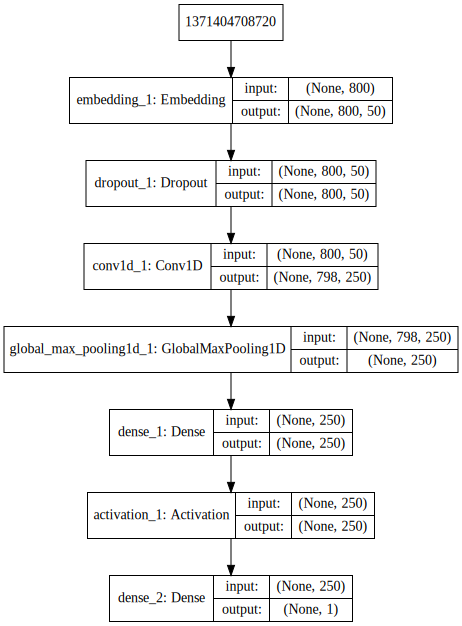

In [11]:
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

Now the model is pre-configured for the training run. [[13]](#r13)<br>
The argumnete used are:
- **optimizer:** String (name of optimizer) or optimizer instance.
- **loss:** String (name of objective function) or objective function. If the model has multiple outputs, you can use a different loss on each output by passing a dictionary or a list of losses. The loss value that will be minimized by the model will then be the sum of all individual losses.
- **metrics:** List of metrics to be evaluated by the model during training and testing. Typically you will use metrics=['accuracy']. To specify different metrics for different outputs of a multi-output model, you could also pass a dictionary, such as metrics={'output_a': 'accuracy'}.

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 13s 503us/step - loss: 0.4422 - acc: 0.7743 - val_loss: 0.3430 - val_acc: 0.8511
Epoch 2/10
25000/25000 [==============================] - 10s 390us/step - loss: 0.2624 - acc: 0.8908 - val_loss: 0.2857 - val_acc: 0.8779
Epoch 3/10
25000/25000 [==============================] - 10s 392us/step - loss: 0.2055 - acc: 0.9202 - val_loss: 0.2823 - val_acc: 0.8813
Epoch 4/10
25000/25000 [==============================] - 10s 392us/step - loss: 0.1722 - acc: 0.9334 - val_loss: 0.2622 - val_acc: 0.8931
Epoch 5/10
25000/25000 [==============================] - 10s 390us/step - loss: 0.1429 - acc: 0.9467 - val_loss: 0.2895 - val_acc: 0.8886
Epoch 6/10
25000/25000 [==============================] - 10s 390us/step - loss: 0.1236 - acc: 0.9543 - val_loss: 0.2916 - val_acc: 0.8912
Epoch 7/10
25000/25000 [==============================] - 10s 392us/step - loss: 0.1117 - acc: 0.9565 - val_loss: 0.

Trains the model on a data set for a specific number of iterations. [[13]](#r13)

The arguments:
- **x:** Numpy array of training data (if the model has a single input), or list of Numpy arrays (if the model has multiple inputs). If input layers in the model are named, you can also pass a dictionary mapping input names to Numpy arrays. x can be None (default) if feeding from framework-native tensors (e.g. TensorFlow data tensors)
- **y:** Numpy array of target (label) data (if the model has a single output), or list of Numpy arrays (if the model has multiple outputs). If output layers in the model are named, you can also pass a dictionary mapping output names to Numpy arrays. y can be None (default) if feeding from framework-native tensors (e.g. TensorFlow data tensors)
- **batch_size:** Integer or None. Number of samples per gradient update. If unspecified, `batch_size` will default to 32
- **epochs:** Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached
- **validation_data:** tuple (`x_val`,` y_val`) or tuple (`x_val`, `y_val`, `val_sample_weights`) on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. `validation_data` will override `validation_split`

### Evaluation data<a id="Evaluation_data"></a>

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Plot data<a id="Plot_data"></a>

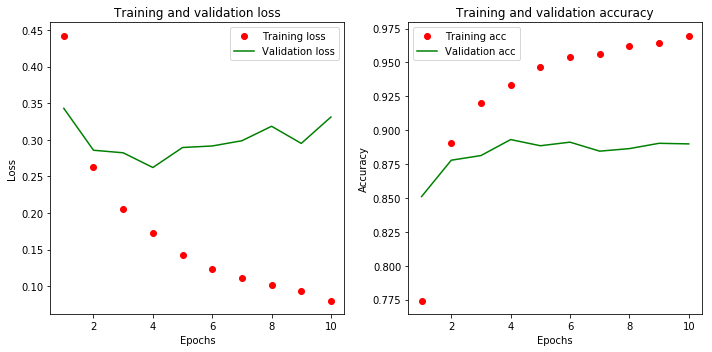

In [14]:
val_loss = history.history['val_loss']
loss = history.history['loss']
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(accuracy) + 1)

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## Predictions<a id="predictions"></a>

Once you have trained your network, you would like to use it in a practical scenario. You can increase the likelihood of positive ratings
with the predict method:  [[4]](#r4)

In [15]:
model_prediction = Sequential()
model_prediction.add(Embedding(10000, 50, input_length=800))
model_prediction.add(Dropout(0.5))
model_prediction.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model_prediction.add(GlobalMaxPooling1D())
model_prediction.add(Dense(250))
model_prediction.add(Activation('relu'))
model_prediction.add(Dense(1))
model_prediction.add(Activation('sigmoid'))
model_prediction.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
#
# training
#
history = model_prediction.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 11s 422us/step - loss: 0.4405 - acc: 0.7794 - val_loss: 0.2893 - val_acc: 0.8790
Epoch 2/3
25000/25000 [==============================] - 10s 414us/step - loss: 0.2588 - acc: 0.8961 - val_loss: 0.2537 - val_acc: 0.8940
Epoch 3/3
25000/25000 [==============================] - 10s 398us/step - loss: 0.2070 - acc: 0.9180 - val_loss: 0.2723 - val_acc: 0.8862


In [16]:
results = model_prediction.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

25000/25000 [==============================] - 2s 85us/step
Accuracy on test set: [0.2722589012670517, 0.88616]
Test loss: 0.2722589012670517
Test accuracy: 0.88616


(array([10029.,  1415.,   898.,   753.,   663.,   721.,   744.,  1018.,
         1571.,  7188.]),
 array([6.7823334e-05, 1.0002697e-01, 1.9998612e-01, 2.9994527e-01,
        3.9990440e-01, 4.9986356e-01, 5.9982270e-01, 6.9978184e-01,
        7.9974103e-01, 8.9970016e-01, 9.9965930e-01], dtype=float32),
 <a list of 10 Patch objects>)

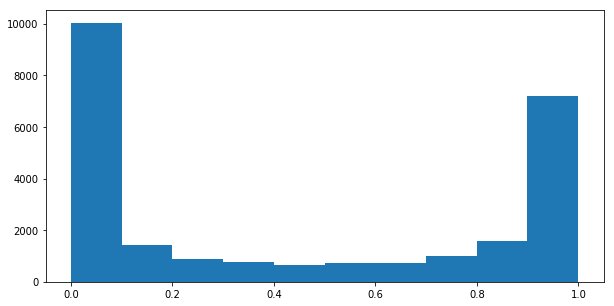

In [17]:
plt.hist(model_prediction.predict(x_test))

Identify a review of the test set that was predicted as positive (prediction score > 0.5) but was rated 0 (negative).

In [18]:
y_pred = model_prediction.predict(x_test)
prediction_is_positive = y_pred > 0.5
label_is_negative = y_test.reshape((25000,1)) == 0

incorrect_cases = np.where(np.logical_and( prediction_is_positive  , label_is_negative ))[0]
#print ("All incorrect cases: ",incorrect_cases[0:])
print ("Predicted score: ", len(incorrect_cases))

Predicted score:  794


## Compromise<a id="compromise"></a>
<br><table><tr>
    <td>![Compromise CNN Plot](img/vergleich_cnn01_plot.png "Compromise CNN Plot")</td>
    <td>![Compromise CNN Prediction](img/vergleich_cnn1_data.png "[Compromise CNN Prediction")</td>
    </tr><tr>
        <td>Compromise Plot</td>
        <td>Compromise Prediction</td>
</tr></table> 

The images `Compromise Plot` and `Compromise Prediction` are taken from the notebook `31_Neural_Networks_IMDB` [[4]](#r4) and should serve as validation of our model.
If we compare the plots, we only see a slightly different distribution of the prediction values. The model from this notebook had more negative reviews than the model from notebook 31_Neural_Networks_IMDB. Which of the models makes the better prediction cannot be seen from the plot diagram. In both cases, the first 10 incorrectly marked reviews were checked. It is noticeable that our model makes a less "wrong" prediction than the model from the notebook 31_Neural_Networks_IMDB. However, since this value is not extremely different, it cannot be assumed that our model is actually a more suitable model. Both models could be improved by optimizations. In addition, both are simple examples. It should also be noted that the value moves back and forth within a certain range. This means that if the notebook is run through again, the model may perform worse, but also much better. The same is true for the other model. Therefore it is often the case in the AI area that several models are trained at the same time to find the best of all models.

## Summary<a id="summary"></a>
Let's recap what we have learned in this tutorial:

- What is the idea behind 1D-CNN and how is it built?
- How a 1D-CNN model is structured in Keras and how you can tune its parameters
- How to train a model to fit a text dataset
- How to visualize the training history

## References<a id="references"></a>

### Code
[1] https://github.com/keras-team/keras/blob/master/examples/imdb_cnn.py<a id="r1"></a><br>
[2] 13_Matplotlib (Deep Learning Exercise)<a id="r2"></a><br>
[3] 31_Neural_Networks_IMDB (Deep Learning Exercise)<a id="r3"></a><br>
[4] 41_CNNs_MNIST (Deep Learning Übung)<a id="r4"></a>

### Explanations
[5] https://keras.io/datasets/<a id="r5"></a><br>
[6] https://keras.io/preprocessing/sequence/<a id="r6"></a><br>
[7] https://keras.io/layers/convolutional/<a id="r7"></a><br>
[8] https://www.wandb.com/classes/intro/class-8<a id="r8"></a><br>
[9] https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526<a id="r9"></a><br>
[10] https://keras.io/layers/embeddings/<a id="r10"></a><br>
[11] https://keras.io/layers/pooling/<a id="r11"></a><br>
[12] https://keras.io/layers/core/<a id="r12"></a><br>
[13] https://keras.io/models/model/<a id="r13"></a><br>

### Other Rescources
[14] https://www.youtube.com/watch?v=ST73HFC4Lpo<a id="r14"></a><br>
[15] https://medium.com/@abhigoku10/activation-functions-and-its-types-in-artifical-neural-network-14511f3080a8<a id="r15"></a><br>

___
## All-in-one solution

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras.utils import plot_model
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#
# Get data
#
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
test_data = x_test
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
#print(x_train[450])

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(sequences=x_train, maxlen=800)
x_test = sequence.pad_sequences(sequences=x_test, maxlen=800)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Build model...')
model = Sequential()
#
# prepeare model
#
model.add(Embedding(input_dim=10000, output_dim=100, input_length=800))
model.add(Dropout(0.5))
model.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])              
#model.summary()
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))
#
# Training
#
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
history_dict = history.history
history_dict.keys()
#
# evaluation
#
results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
#
# Plot
#
val_loss = history.history['val_loss']
loss = history.history['loss']
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(accuracy) + 1)

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
#
# PREDICTION
#
model_prediction = Sequential()
model_prediction.add(Embedding(10000, 50, input_length=800))
model_prediction.add(Dropout(0.5))
model_prediction.add(Conv1D(filters=250, kernel_size=3, padding='valid', activation='relu', strides=1))
model_prediction.add(GlobalMaxPooling1D())
model_prediction.add(Dense(250))
model_prediction.add(Activation('relu'))
model_prediction.add(Dense(1))
model_prediction.add(Activation('sigmoid'))
model_prediction.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
#
# training
#
history = model_prediction.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_test, y_test))
#
# Evaluation
#
results = model.evaluate(x_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
#
# Plot
#
plt.hist(model_prediction.predict(x_test))
#
# Prediction
#
y_pred = model_prediction.predict(x_test)
prediction_is_positive = y_pred > 0.5
label_is_negative = y_test.reshape((25000,1)) == 0

incorrect_cases = np.where(np.logical_and( prediction_is_positive  , label_is_negative ))[0]
#print ("All incorrect cases: ",incorrect_cases[0:])
print ("Predicted score: ", len(incorrect_cases))